In [2]:
import numpy as np
import pandas as pd
import pickle

labels = pd.read_csv('y_train.csv', index_col='id')
data = pd.read_csv('X_train.csv', index_col='id')

In [11]:
labels_array = labels['y'].to_numpy()

In [12]:
signal = data.loc[6].dropna().to_numpy(dtype='float32')
import pickle

In [17]:
ws = 1024
overlap = 100


def create_new_data(signal,ws,overlap):
    ret = []

    if overlap > ws:
        raise(ValueError)

    j = 0
    stride = int(ws- overlap)
    for i in range(int(np.floor((len(signal)-ws)/stride)+1)):
        ret.append(signal[j:j+ws])
        j = j+stride

    return ret


ret = create_new_data(signal,ws,overlap)

print(len(ret))
print(len(signal))
print(ret[0])

    



9
8804
[ 19.  36.  51. ... 739. 872. 920.]


In [18]:
class_0 = np.argwhere(labels_array==0).flatten()
class_1 = np.argwhere(labels_array==1).flatten()
class_2 = np.argwhere(labels_array==2).flatten()
class_3 = np.argwhere(labels_array==3).flatten()

print(len(class_0),len(class_1),len(class_2),len(class_3))

n_0, n_1, n_2, n_3 = len(class_0),len(class_1),len(class_2),len(class_3)

3030 443 1474 170


In [19]:
new_data = []
classes = []

stride_0 = 800
stride_1 = stride_0 // (n_0 / n_1)
stride_2 = stride_0 // (n_0 / n_2)
stride_3 = 0.8* stride_0 // (n_0 / n_3)

strides = [stride_0,stride_1,stride_2,stride_3]


for i in range(len(data)):
    #classe = [1,0,0,0] if i in class_0 else [0,1,0,0] if i in class_1 else [0,0,1,0] if i in class_2 else [0,0,0,1]
    #new_samples = create_new_data(data.loc[i].dropna().to_numpy(),ws, ws- strides[ classe])
    classe = 0 if i in class_0 else 1 if i in class_1 else 2 if i in class_2 else 3
    new_samples = create_new_data(data.loc[i].dropna().to_numpy(),ws, ws- strides[ classe])
    new_data = new_data + new_samples
    #classes = classes + [classe] * len(new_samples)
    for i in range(len(new_samples)):
        classes.append(classe)

print(len(new_data))


122550


In [20]:
print(classes.count(0),classes.count(1),classes.count(2),classes.count(3))

31554 30481 33134 27381


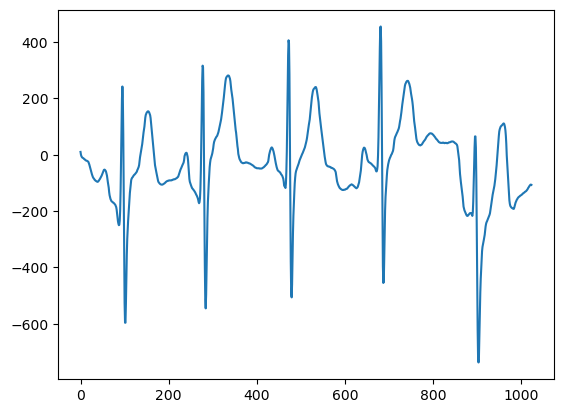

In [21]:
import matplotlib.pyplot as plt

plt.plot(range(0,len(new_data[112])),new_data[112])

In [22]:
with open('evenet_data.pkl', 'wb') as f:
    pickle.dump((new_data[0:100],classes[0:100]), f)